# **Практическая работа 8: больше графиков и больше численного анализа**

## **План лекции**

- Обсуждение плана занятия
- Самостоятельная работа + вопросы

Сразу импортируем то, что нам понадобится:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

# Семинарские задания и домашние задания (0.8 баллов)

### Ну как всегда посмотрим на ошибки

✅ **(0.05 балла)** Поправьте код в следующей ячейке:

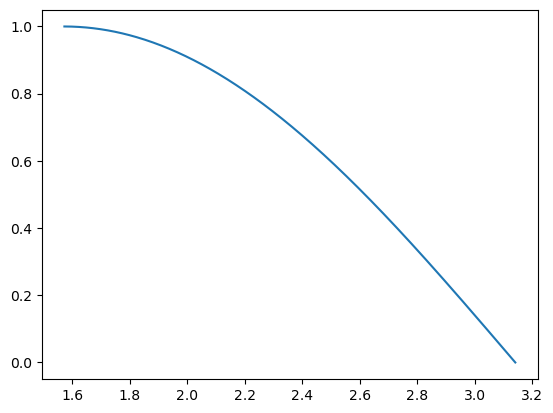

In [2]:
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)

mask = x > np.pi/2

plt.plot(x[mask], y[mask])

✅ **(0.05 балла)** Почему первый `plt.plot` рисует график, а второй ничего не рисует?

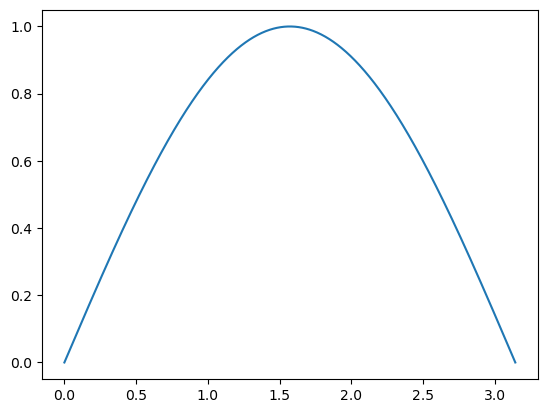

In [ ]:
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)

mask = x < -5

plt.plot(x, y, 'C0')
plt.plot(x[mask], y[mask], 'C1') # не работает, так как данные для х и y не меньше 0, а условие mask  меньше -5

## Мотематичка может хватит...

❓ **(0.03/0.05 балла)** Нарисуйте другим цветом ту часть графика, где `phi > pi`

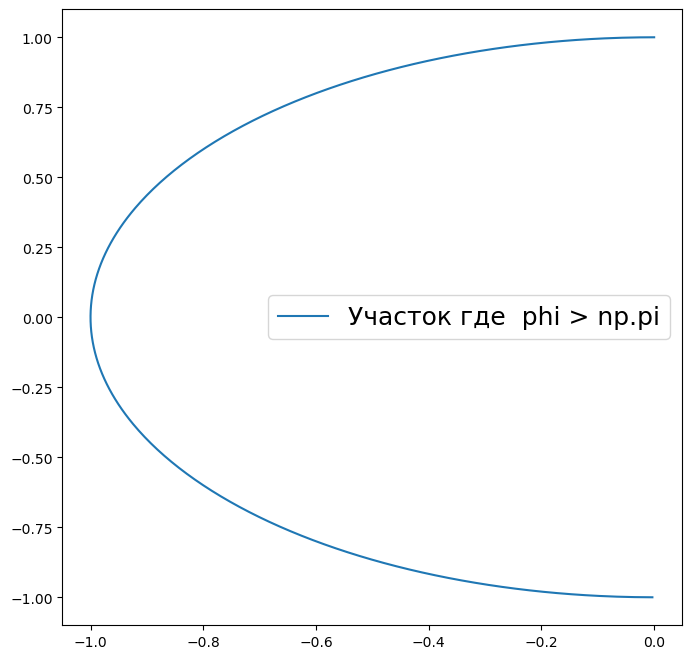

In [4]:
phi = np.linspace(0, 2*np.pi, 1000)
x = np.sin(phi)
y = np.cos(phi)

mask_phi = phi > np.pi
plt.figure(figsize=(8, 8))
plt.plot(x[mask_phi], y[mask_phi], label='Участок где  phi > np.pi')
plt.legend(fontsize=18) 

Коммент: подразумевалось на одном графике нарисовать два участка графика :(

✅ **(0.05 балла)** Нарисуйте разными цветами все 4 разных части графика:
- `x > 0, y > 0`
- `x < 0, y > 0`
- `x < 0, y < 0`
- `x > 0, y < 0`

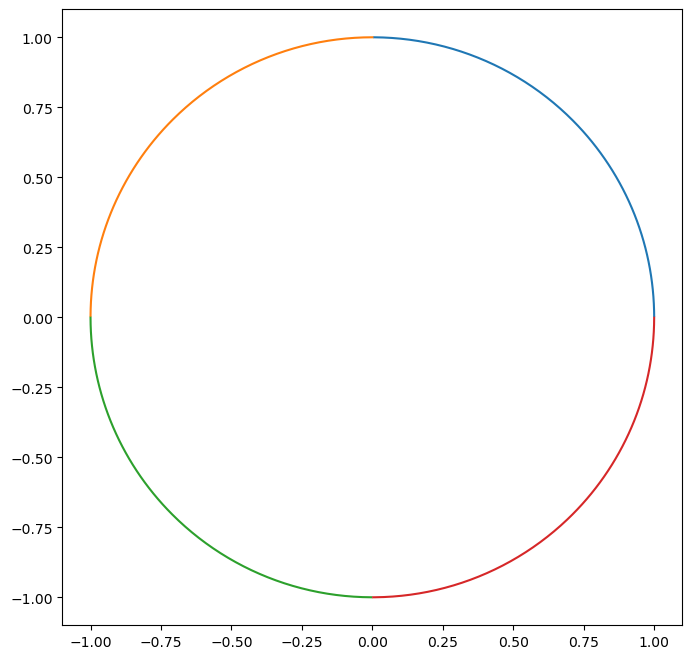

In [5]:
# Ваш код
phi = np.linspace(0, 2*np.pi, 1000)
x = np.sin(phi)
y = np.cos(phi)

mask_1 = (x > 0) & (y > 0)
mask_2 = (x < 0) & (y > 0)
mask_3 = (x < 0) & (y < 0)
mask_4 = (x > 0) & (y < 0)
plt.figure(figsize=(8,8))
plt.plot(x[mask_1], y[mask_1])
plt.plot(x[mask_2], y[mask_2])
plt.plot(x[mask_3], y[mask_3])
plt.plot(x[mask_4], y[mask_4])

## NaNi?...

В файле `data/nans.txt` лежат данные, часть из которых этот [NaN](https://en.wikipedia.org/wiki/NaN)-ы: специальная величина, которая говорит о том, что данные либо отсутствуют, либо повреждены, etc. 

✅ **(0.05 балла)** Загрузите данные из файла и постройте график:

array([[-10.        ,  -1.        ],
       [ -9.98      ,  -1.00037468],
       [ -9.96      ,  -1.00074137],
       ...,
       [  1.24      ,          nan],
       [  1.26      ,          nan],
       [  1.28      ,          nan]])

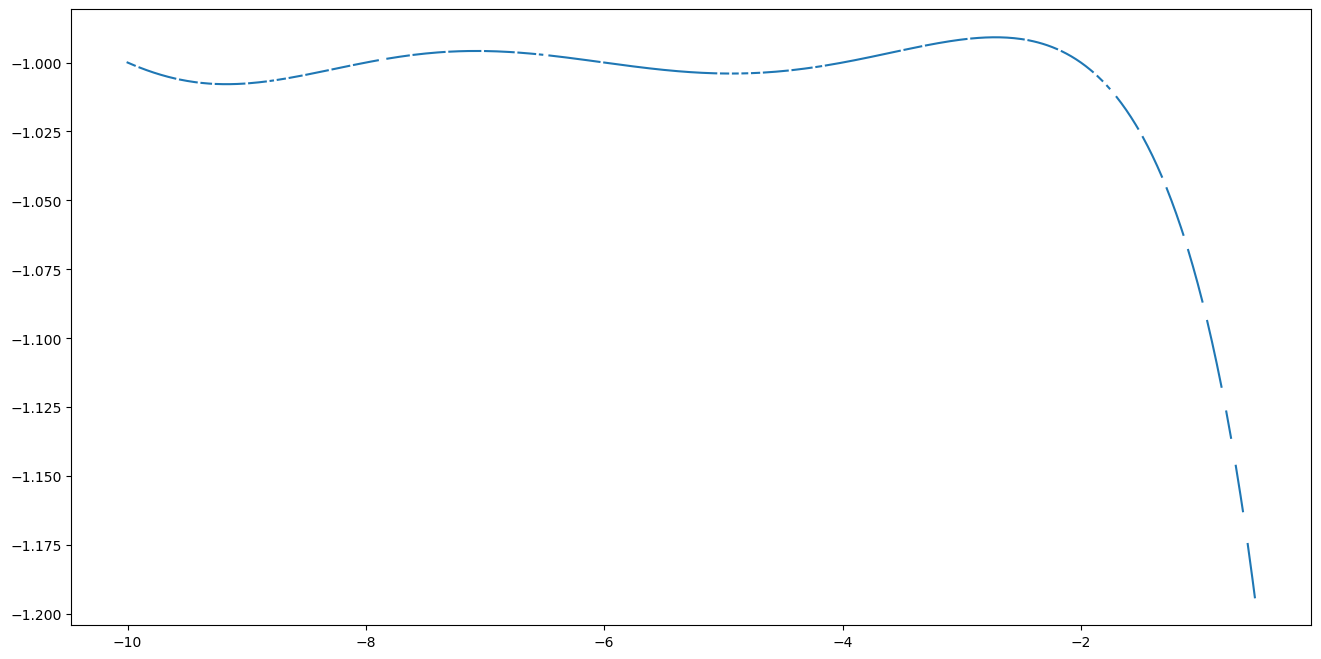

In [6]:
# Ваш код
nans = np.loadtxt('data/nans.txt')
nans
nans_1 = nans[:,0]
nans_2 = nans[:,1]
plt.figure(figsize=(16,8))
plt.plot(nans_1, nans_2)
nans

Функция `np.isnan` принимает на вход массив, а возвращает булевую маску, где значения `True` соответствуют тем ячейкам, в которых есть `NaN`. 

✅ **(0.1 балла)**  Используя эту функцию, получите массив без `NaN` и постройте его на графике:

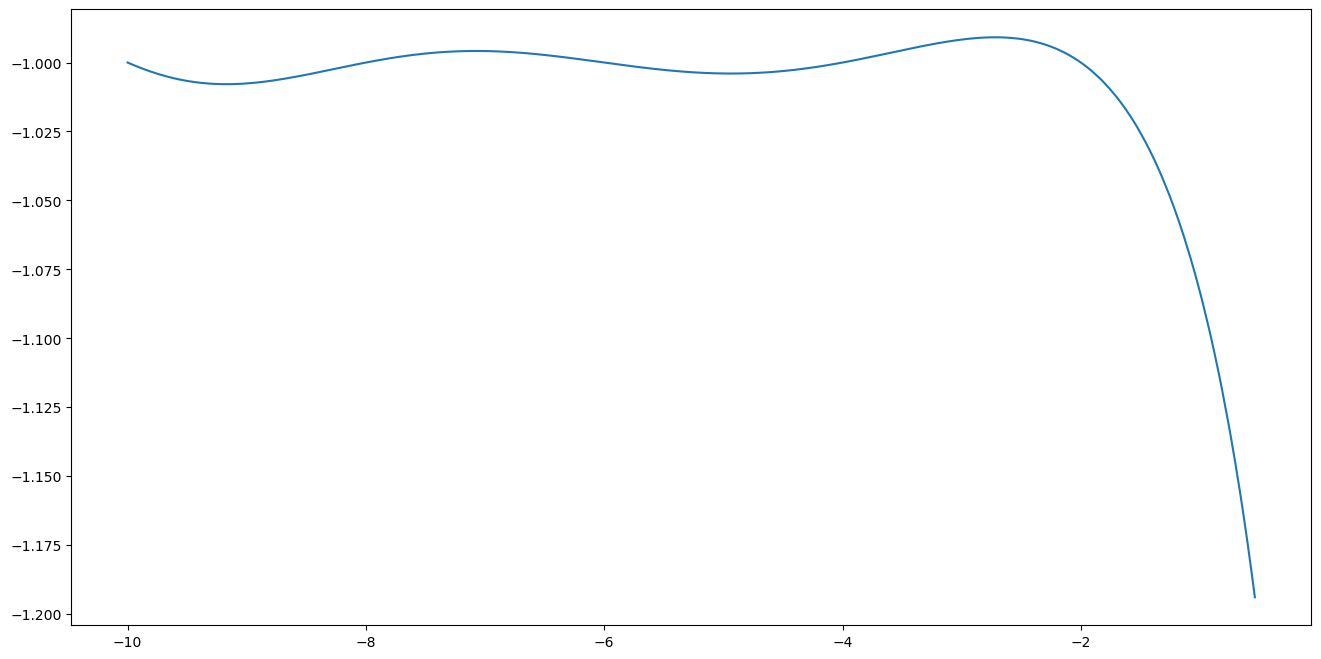

In [7]:
# Ваш код
no_nan = np.isnan(nans)
no_nan_2 = np.isnan(nans_2)
plt.figure(figsize=(16,8))
plt.plot(nans_1[~no_nan_2], nans_2[~no_nan_2])

## Визулизация климатических сценариев [IPCC AR6](https://en.wikipedia.org/wiki/IPCC_Sixth_Assessment_Report)

Межправительственная группа экспертов по изменению климата раз в несколько лет выпускает оценочный доклад по оценке изменения климата с использованием разных климатических моделей. Для того чтобы визуализировать данные предсказаний моделей, нужно рисовать доверительные интервалы моделей. 

✅ **(0.1 балла)** Загрузите все `.csv` файлы из `panel_a`:

In [8]:
# Ваш код
historic = pd.read_csv('data/panel_a/tas_global_Historical.csv')
SSP1_1_9 = pd.read_csv('data/panel_a/tas_global_SSP1_1_9.csv')
SSP1_2_6 = pd.read_csv('data/panel_a/tas_global_SSP1_2_6.csv')
SSP2_4_5 = pd.read_csv('data/panel_a/tas_global_SSP2_4_5.csv')
SSP3_7_0 = pd.read_csv('data/panel_a/tas_global_SSP3_7_0.csv')
SSP5_8_5 = pd.read_csv('data/panel_a/tas_global_SSP5_8_5.csv')
historic

,Year,5%,Mean,95%
0,1950.0,-0.060030,0.252242,0.608546
1,1951.0,-0.055686,0.274715,0.525308
2,1952.0,-0.042891,0.274303,0.540725
3,1953.0,-0.020530,0.253376,0.535419
4,1954.0,-0.127657,0.246369,0.553914
...,...,...,...,...
60,2010.0,0.836971,1.002620,1.280120
61,2011.0,0.842644,1.036330,1.189250
62,2012.0,0.882825,1.061300,1.240670
63,2013.0,0.913046,1.084920,1.285700


✅ **(0.1 балл)** Нарисуйте средние данные (колонка `Mean`) от года из каждого `.csv` на одном графике. Оформите график (размер шрифта, размер графика, легенда, etc.). Здесь и далее можете ориентироваться на стиль [оригинального графика](https://www.ipcc.ch/report/ar6/wg1/figures/summary-for-policymakers/figure-spm-8/):

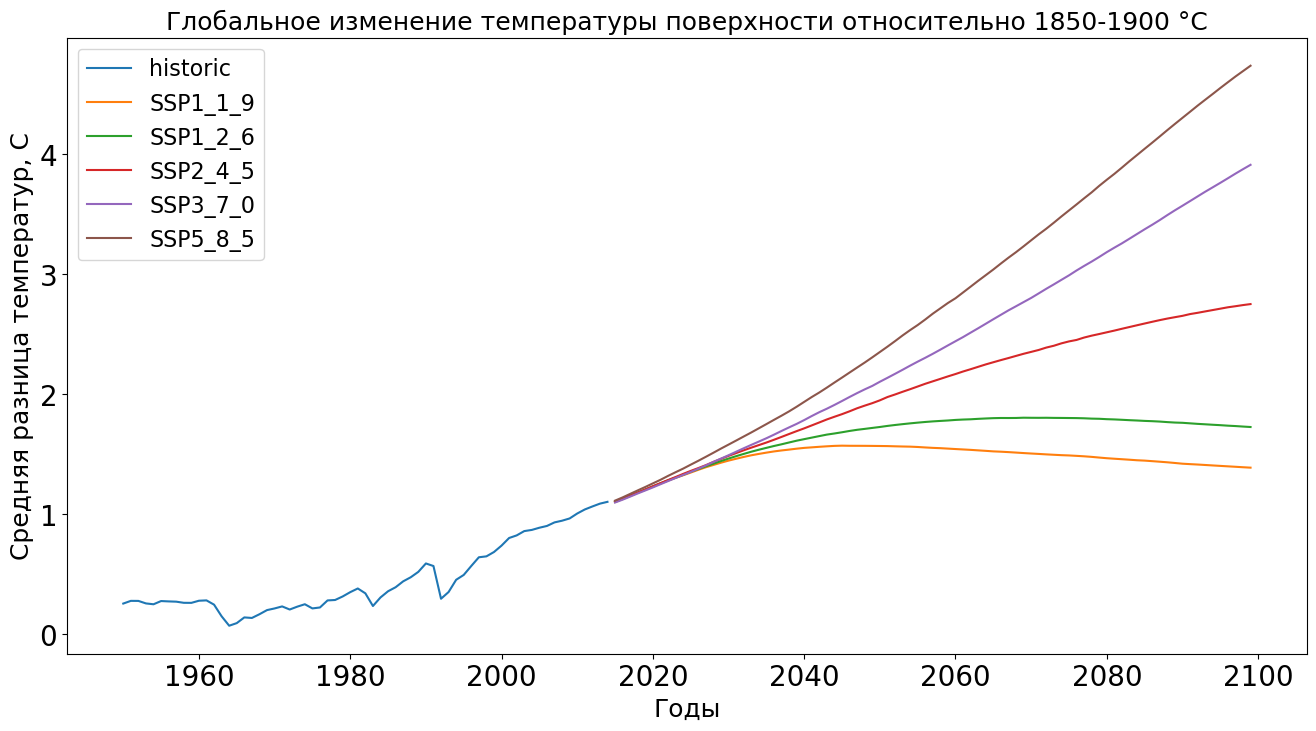

In [9]:
# Ваш код
plt.figure(figsize=(16,8))
plt.plot(historic['Year'], historic['Mean'], label = 'historic')
plt.plot(SSP1_1_9['Year'], SSP1_1_9['Mean'], label = 'SSP1_1_9')
plt.plot(SSP1_2_6['Year'], SSP1_2_6['Mean'], label = 'SSP1_2_6')
plt.plot(SSP2_4_5['Year'], SSP2_4_5['Mean'], label = 'SSP2_4_5')
plt.plot(SSP3_7_0['Year'], SSP3_7_0['Mean'], label = 'SSP3_7_0')
plt.plot(SSP5_8_5['Year'], SSP5_8_5['Mean'], label = 'SSP5_8_5')
plt.legend(fontsize=16) 
plt.xlabel('Годы', fontsize=18)
plt.title('Глобальное изменение температуры поверхности относительно 1850-1900 °C', fontsize=18)
plt.ylabel('Средняя разница температур, С', fontsize=18)
plt.gca().tick_params(labelsize=20)

✅ **(0.1 балл)** На этом же графике нарисуйте доверительные интервалы с помощью `plt.fill_between` с прозрачностью `alpha=0.1` (колонки `5%` и `95%`):

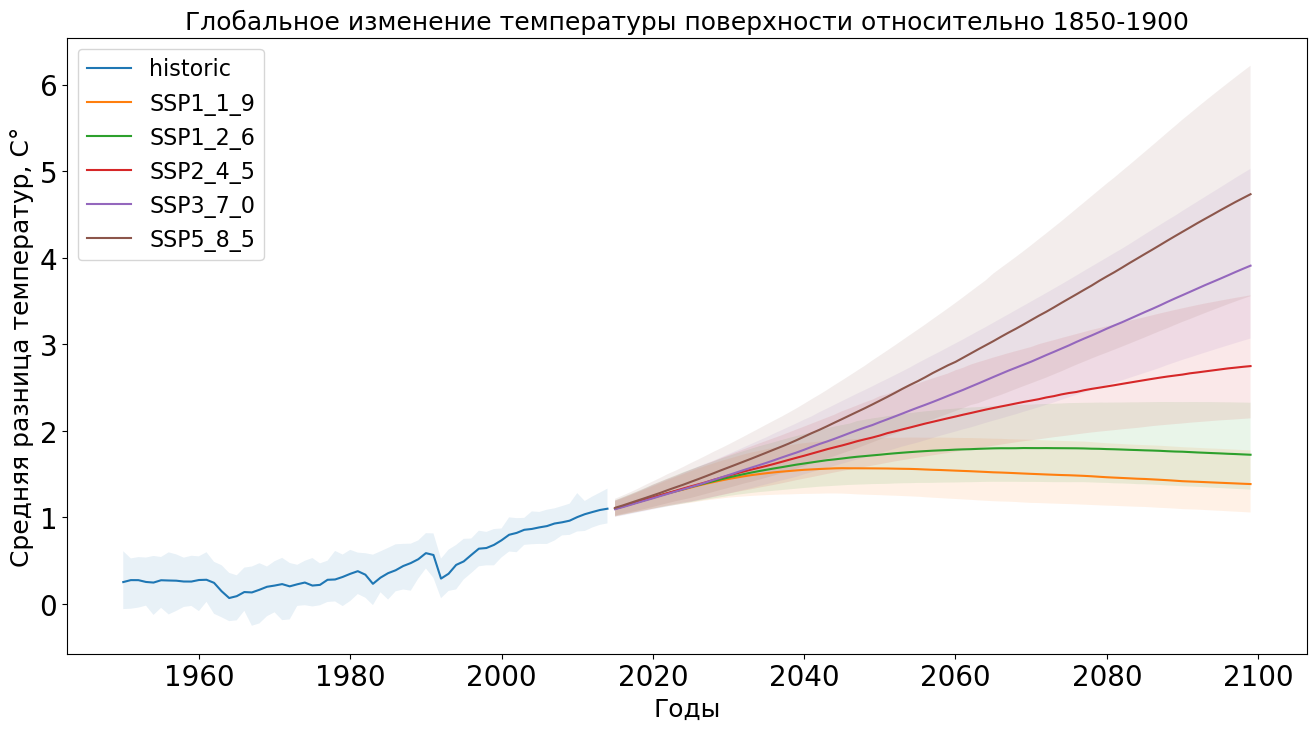

In [10]:
# Ваш код
plt.figure(figsize=(16,8))
plt.plot(historic['Year'], historic['Mean'], label = 'historic')
plt.plot(SSP1_1_9['Year'], SSP1_1_9['Mean'], label = 'SSP1_1_9')
plt.plot(SSP1_2_6['Year'], SSP1_2_6['Mean'], label = 'SSP1_2_6')
plt.plot(SSP2_4_5['Year'], SSP2_4_5['Mean'], label = 'SSP2_4_5')
plt.plot(SSP3_7_0['Year'], SSP3_7_0['Mean'], label = 'SSP3_7_0')
plt.plot(SSP5_8_5['Year'], SSP5_8_5['Mean'], label = 'SSP5_8_5')
plt.fill_between(historic['Year'],historic['5%'], historic['95%'], alpha=0.1)
plt.fill_between(SSP1_1_9['Year'],SSP1_1_9['5%'], SSP1_1_9['95%'], alpha=0.1)
plt.fill_between(SSP1_2_6['Year'],SSP1_2_6['5%'], SSP1_2_6['95%'], alpha=0.1)
plt.fill_between(SSP2_4_5['Year'],SSP2_4_5['5%'], SSP2_4_5['95%'], alpha=0.1)
plt.fill_between(SSP3_7_0['Year'],SSP3_7_0['5%'], SSP3_7_0['95%'], alpha=0.1)
plt.fill_between(SSP5_8_5['Year'],SSP5_8_5['5%'], SSP5_8_5['95%'], alpha=0.1)
plt.legend(fontsize=16) 
plt.xlabel('Годы', fontsize=18)
plt.title('Глобальное изменение температуры поверхности относительно 1850-1900', fontsize=18)
plt.ylabel('Средняя разница температур, С°', fontsize=18)
plt.gca().tick_params(labelsize=20)

❓ **(0.1/0.15 балла)** Нарисуйте в том же стиле (графики, доверительные интервалы, оформление) данные из `data/panel_d`

In [11]:
global_sea_level_observed = pd.read_csv('data/panel_d/global_sea_level_observed.csv')
global_sea_level_projected = pd.read_csv('data/panel_d/global_sea_level_projected.csv')

global_sea_level_projected

,Year,SSP1-1.9 Central,SSP1-2.6 17%,SSP1-2.6 Central,SSP1-2.6 83%,SSP2-4.5 Central,SSP3-7.0 17%,SSP3-7.0 Central,SSP3-7.0 83%,SSP5-8.5 Central,SSP5-8.5 Low Confidence 83%,SSP5-8.5 Low Confidence 95%
0,2020,0.208,0.198,0.208,0.218,0.208,0.198,0.208,0.218,0.208,0.228,0.238
1,2030,0.248,0.238,0.248,0.278,0.248,0.238,0.248,0.278,0.258,0.308,0.358
2,2040,0.288,0.268,0.298,0.328,0.298,0.278,0.298,0.338,0.318,0.418,0.508
3,2050,0.338,0.318,0.348,0.408,0.358,0.338,0.368,0.428,0.388,0.558,0.698
4,2060,0.368,0.348,0.388,0.468,0.418,0.398,0.438,0.518,0.468,0.728,0.928
5,2070,0.418,0.388,0.448,0.548,0.488,0.468,0.528,0.638,0.558,0.938,1.208
6,2080,0.458,0.428,0.498,0.628,0.558,0.538,0.618,0.758,0.668,1.188,1.558
7,2090,0.508,0.458,0.548,0.698,0.638,0.618,0.718,0.898,0.788,1.458,1.958
8,2100,0.538,0.478,0.598,0.768,0.718,0.708,0.838,1.058,0.928,1.758,2.428


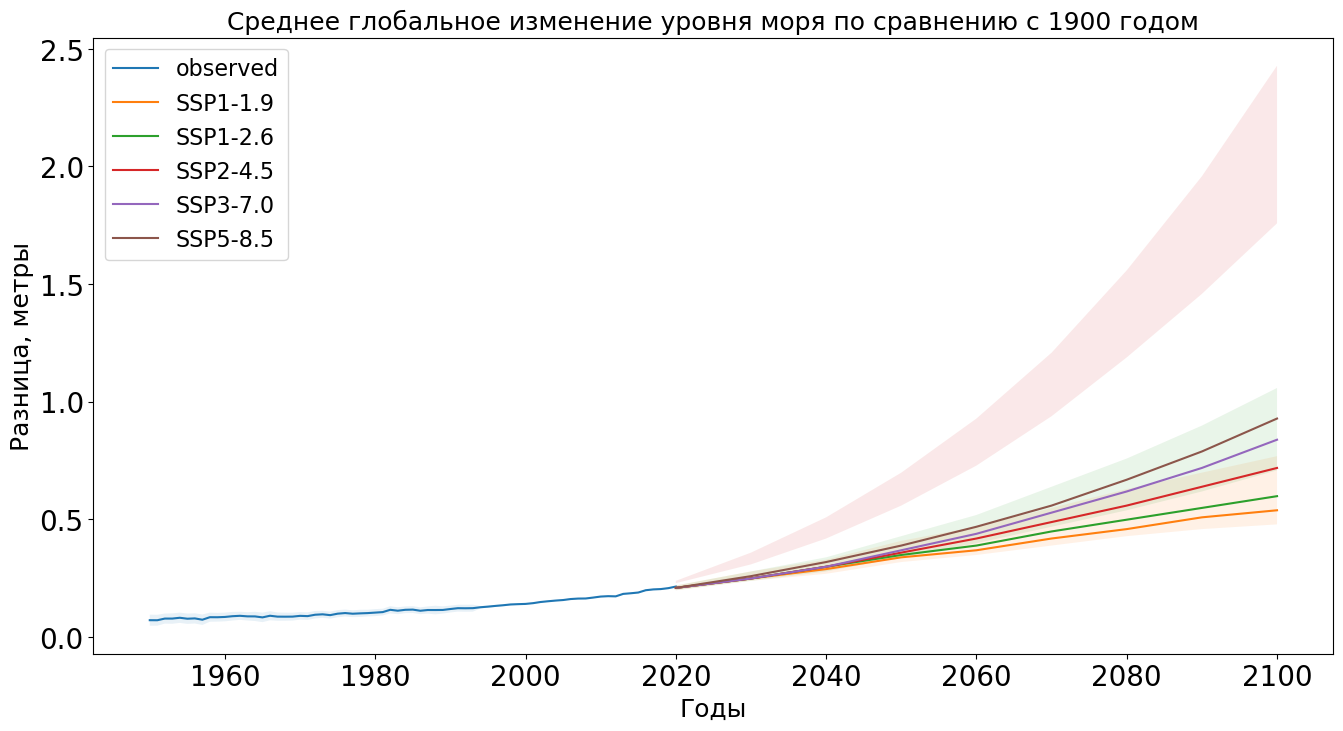

In [ ]:
# Ваш код
plt.figure(figsize=(16,8))
plt.plot(global_sea_level_observed['Year'], global_sea_level_observed['Central'], label = 'observed')
plt.plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP1-1.9 Central'], label = 'SSP1-1.9')
plt.plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP1-2.6 Central'], label = 'SSP1-2.6')
plt.plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP2-4.5 Central'], label = 'SSP2-4.5')
plt.plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP3-7.0 Central'], label = 'SSP3-7.0')
plt.plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP5-8.5 Central'], label = 'SSP5-8.5')


plt.fill_between(global_sea_level_observed['Year'],global_sea_level_observed['17%'], global_sea_level_observed['83%'], alpha=0.1)
plt.fill_between(global_sea_level_projected['Year'],global_sea_level_projected['SSP1-2.6 17%'], global_sea_level_projected['SSP1-2.6 83%'], alpha=0.1)
plt.fill_between(global_sea_level_projected['Year'],global_sea_level_projected['SSP3-7.0 17%'], global_sea_level_projected['SSP3-7.0 83%'], alpha=0.1)
plt.fill_between(global_sea_level_projected['Year'],global_sea_level_projected['SSP5-8.5 Low Confidence 83%'], global_sea_level_projected['SSP5-8.5 Low Confidence 95%'], alpha=0.1)



plt.legend(fontsize=16) 
plt.xlabel('Годы', fontsize=18)
plt.title('Среднее глобальное изменение уровня моря по сравнению с 1900 годом', fontsize=18)
plt.ylabel('Разница, метры', fontsize=18)
plt.gca().tick_params(labelsize=20)

Коммент: проблема визуализации с диапазоном. Вроде там нужно поменять местами переменные (у меня была такая же ошибка в прошлом году)

❓ **(0.06/0.1 балл)** Скомбинируйте два получившихся графика на `plt.subplots(2, 1)` (двух сабплотах один над другим):

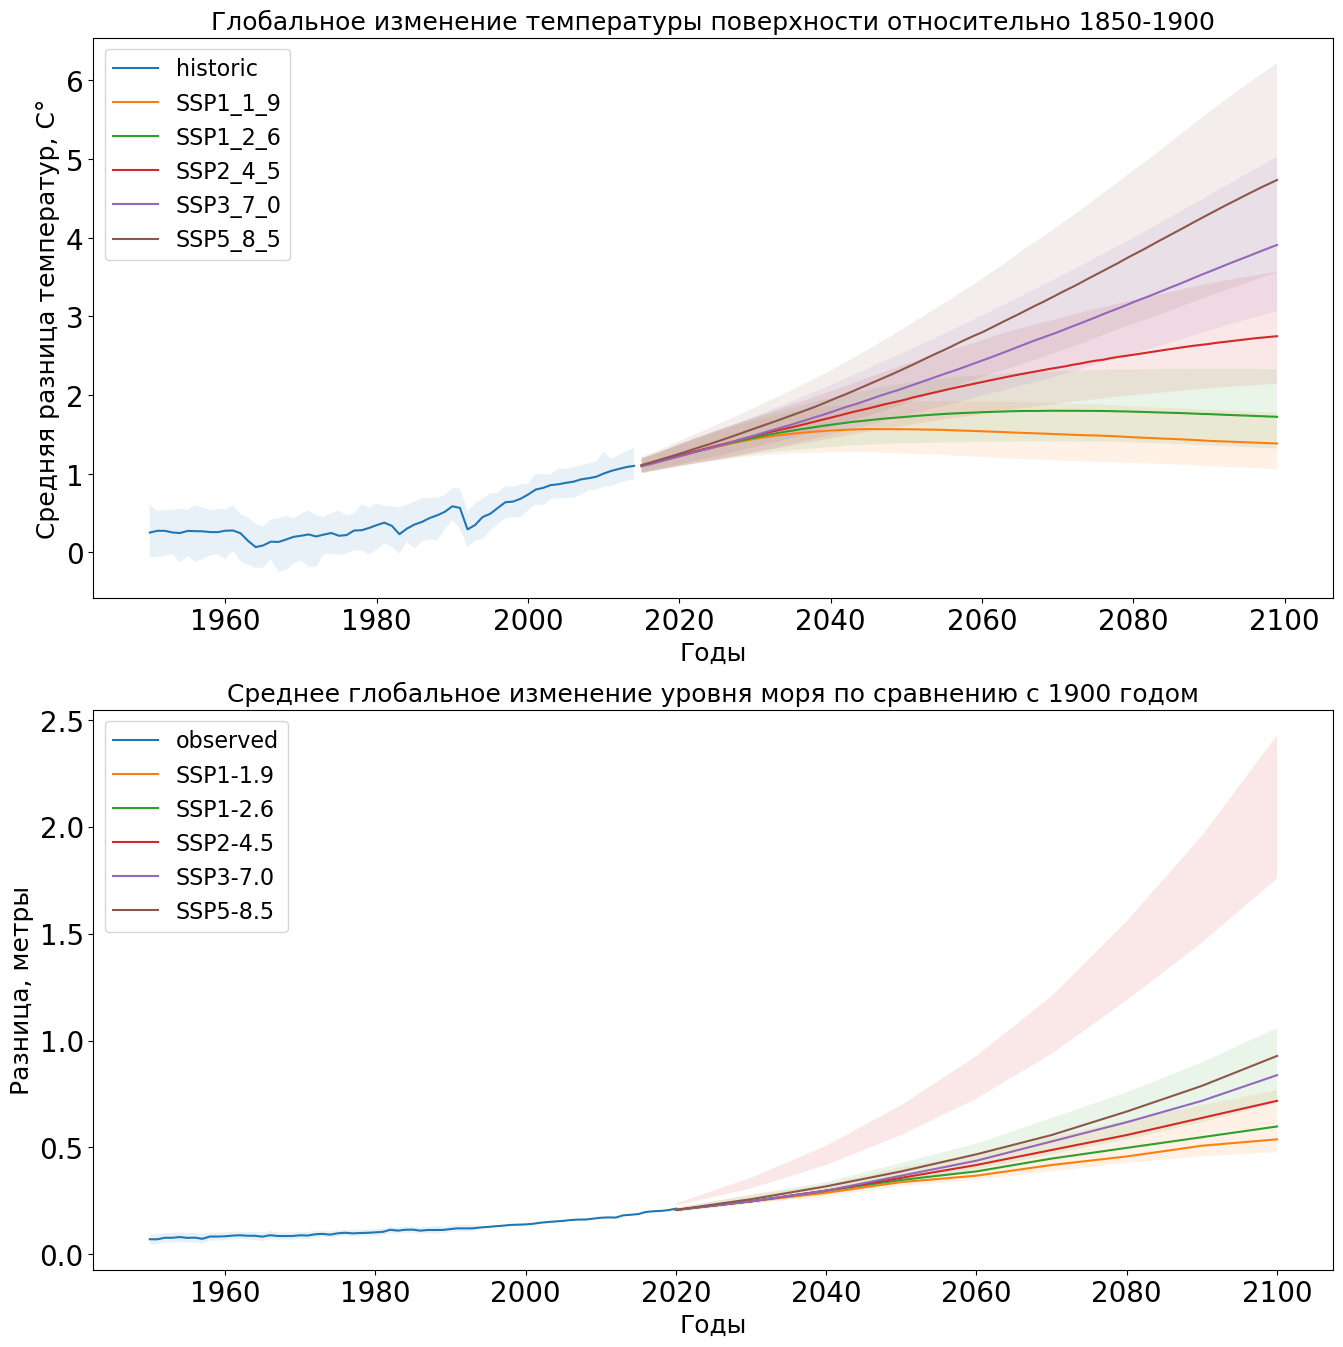

In [13]:
# Ваш код
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

axs[0].plot(historic['Year'], historic['Mean'], label='historic')
axs[0].plot(SSP1_1_9['Year'], SSP1_1_9['Mean'], label='SSP1_1_9')
axs[0].plot(SSP1_2_6['Year'], SSP1_2_6['Mean'], label='SSP1_2_6')
axs[0].plot(SSP2_4_5['Year'], SSP2_4_5['Mean'], label='SSP2_4_5')
axs[0].plot(SSP3_7_0['Year'], SSP3_7_0['Mean'], label='SSP3_7_0')
axs[0].plot(SSP5_8_5['Year'], SSP5_8_5['Mean'], label='SSP5_8_5')

axs[0].fill_between(historic['Year'], historic['5%'], historic['95%'], alpha=0.1)
axs[0].fill_between(SSP1_1_9['Year'], SSP1_1_9['5%'], SSP1_1_9['95%'], alpha=0.1)
axs[0].fill_between(SSP1_2_6['Year'], SSP1_2_6['5%'], SSP1_2_6['95%'], alpha=0.1)
axs[0].fill_between(SSP2_4_5['Year'], SSP2_4_5['5%'], SSP2_4_5['95%'], alpha=0.1)
axs[0].fill_between(SSP3_7_0['Year'], SSP3_7_0['5%'], SSP3_7_0['95%'], alpha=0.1)
axs[0].fill_between(SSP5_8_5['Year'], SSP5_8_5['5%'], SSP5_8_5['95%'], alpha=0.1)

axs[0].legend(fontsize=16)
axs[0].set_xlabel('Годы', fontsize=18)
axs[0].set_title('Глобальное изменение температуры поверхности относительно 1850-1900', fontsize=18)
axs[0].set_ylabel('Средняя разница температур, С°', fontsize=18)
axs[0].tick_params(labelsize=20)

axs[1].plot(global_sea_level_observed['Year'], global_sea_level_observed['Central'], label='observed')
axs[1].plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP1-1.9 Central'], label='SSP1-1.9')
axs[1].plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP1-2.6 Central'], label='SSP1-2.6')
axs[1].plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP2-4.5 Central'], label='SSP2-4.5')
axs[1].plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP3-7.0 Central'], label='SSP3-7.0')
axs[1].plot(global_sea_level_projected['Year'], global_sea_level_projected['SSP5-8.5 Central'], label='SSP5-8.5')

axs[1].fill_between(global_sea_level_observed['Year'], global_sea_level_observed['17%'], global_sea_level_observed['83%'], alpha=0.1)
axs[1].fill_between(global_sea_level_projected['Year'], global_sea_level_projected['SSP1-2.6 17%'], global_sea_level_projected['SSP1-2.6 83%'], alpha=0.1)
axs[1].fill_between(global_sea_level_projected['Year'], global_sea_level_projected['SSP3-7.0 17%'], global_sea_level_projected['SSP3-7.0 83%'], alpha=0.1)
axs[1].fill_between(global_sea_level_projected['Year'], global_sea_level_projected['SSP5-8.5 Low Confidence 83%'], global_sea_level_projected['SSP5-8.5 Low Confidence 95%'], alpha=0.1)

axs[1].legend(fontsize=16)
axs[1].set_xlabel('Годы', fontsize=18)
axs[1].set_title('Среднее глобальное изменение уровня моря по сравнению с 1900 годом', fontsize=18)
axs[1].set_ylabel('Разница, метры', fontsize=18)
axs[1].tick_params(labelsize=20)


Коммент: визуализация :(

## Ну и много ли этих ваших экзопланет...

✅ (**0.05 балла**) Откройте с помощью `pandas` файл `data/exoplanets.csv`. В нем находится выборка экзопланет, открытых разными телескопами. Выберите только те, которые открыты [телескопом TESS](https://ru.wikipedia.org/wiki/TESS):

In [14]:
# Ваш код 
exoplanets = pd.read_csv('data/exoplanets.csv')
exoplanets

,pl_name,hostname,disc_year,soltype,pl_orbper,sy_dist,disc_facility
0,11 Com b,11 Com,2007,Published Confirmed,NaN,93.1846,Xinglong Station
1,11 Com b,11 Com,2007,Published Confirmed,326.03000,93.1846,Xinglong Station
2,11 Com b,11 Com,2007,Published Confirmed,323.21000,93.1846,Xinglong Station
3,11 UMi b,11 UMi,2009,Published Confirmed,516.21997,125.3210,Thueringer Landessternwarte Tautenburg
4,11 UMi b,11 UMi,2009,Published Confirmed,NaN,125.3210,Thueringer Landessternwarte Tautenburg
...,...,...,...,...,...,...,...
35878,ups And d,ups And,1999,Published Confirmed,1319.00000,13.4054,Multiple Observatories
35879,ups Leo b,ups Leo,2021,Published Confirmed,385.20000,52.5973,Okayama Astrophysical Observatory
35880,xi Aql b,xi Aql,2007,Published Confirmed,NaN,56.1858,Okayama Astrophysical Observatory
35881,xi Aql b,xi Aql,2007,Published Confirmed,136.75000,56.1858,Okayama Astrophysical Observatory


✅ (**0.05 балла**) Какой у них максимальный орбитальный период (`pl_orbper`, дни)? 

In [15]:
# Ваш код 
print(exoplanets['pl_orbper'].max())

402000000.0


✅ (**0.1 балла**) Как называется самая далекая открытая экзопланета (`sy_dist`, парсеки)?

In [16]:
# Ваш код 
# 
max_ = np.argmax(exoplanets['pl_orbper'])
print(exoplanets['pl_name'][max_])

COCONUTS-2 b


✅ (**0.1 балла**) Выберите только те, которые открыты [телескопом TESS](https://ru.wikipedia.org/wiki/TESS) в 2023-ем году:

In [17]:
# Ваш код 
# Создаем маску для телескопа TESS и года 2023
mask = (exoplanets['disc_facility'] == 'Transiting Exoplanet Survey Satellite (TESS)') & (exoplanets['disc_year'] == 2023)
tess_2023_planets = exoplanets[mask]
print("Всего", len(tess_2023_planets), "планет, открытых TESS в 2023 году")

Всего 270 планет, открытых TESS в 2023 году


## Это че на Марсе такое??

В файле `data/co2ice.txt` лежит пример спектра отражения CO$_2$ льда на южной полярной шапке Марса (да, частично полярные шапки Марса состоят из CO$_2$ льда). Это кусок спектра, измеренного в ИК-диапазоне, а линии поглощения говорят нам о том, что это именно CO$_2$ лед, а не, скажем, водяной лед. 

✅ **(0.1 балл)** Загрузите эти данные, постройте график и оформите его (описание столбцов есть в файле):

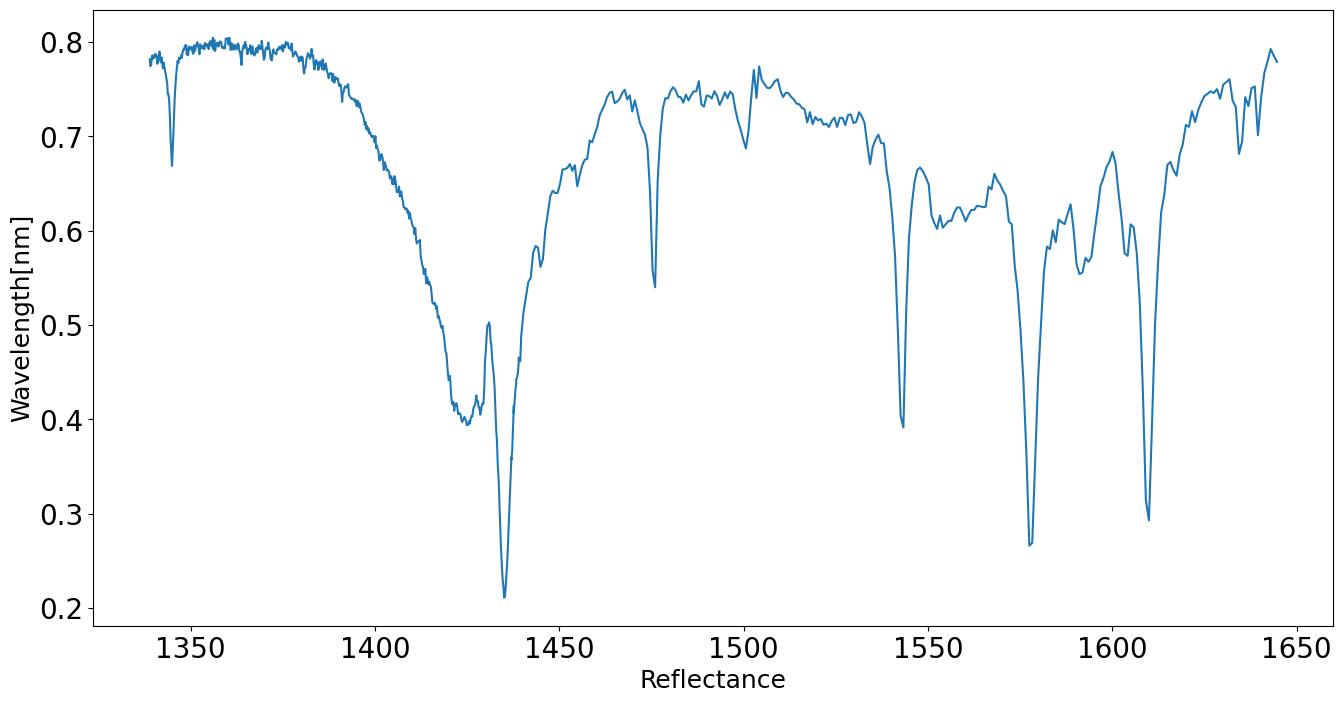

In [18]:
# Ваш код
co2ice = np.loadtxt('data/co2ice.txt')
co2ice
co2ice_1 = co2ice[:,0]
co2ice_2 = co2ice[:,1]
plt.figure(figsize=(16,8))
plt.plot(co2ice_1, co2ice_2)

plt.xlabel('Reflectance', fontsize=18)
#plt.title('-', fontsize=18)
plt.ylabel('Wavelength[nm]', fontsize=18)
plt.gca().tick_params(labelsize=20)

Мы хотим наглядно показать полосы поглощения CO$_2$, а конкретно полосу около 1430 нанометров (границы полосы на этом спектре: от 1375 нанометров до 1467 нанометров).

✅ **(0.1 балл)** Выделите эту полос поглощения на графике другим цветом:

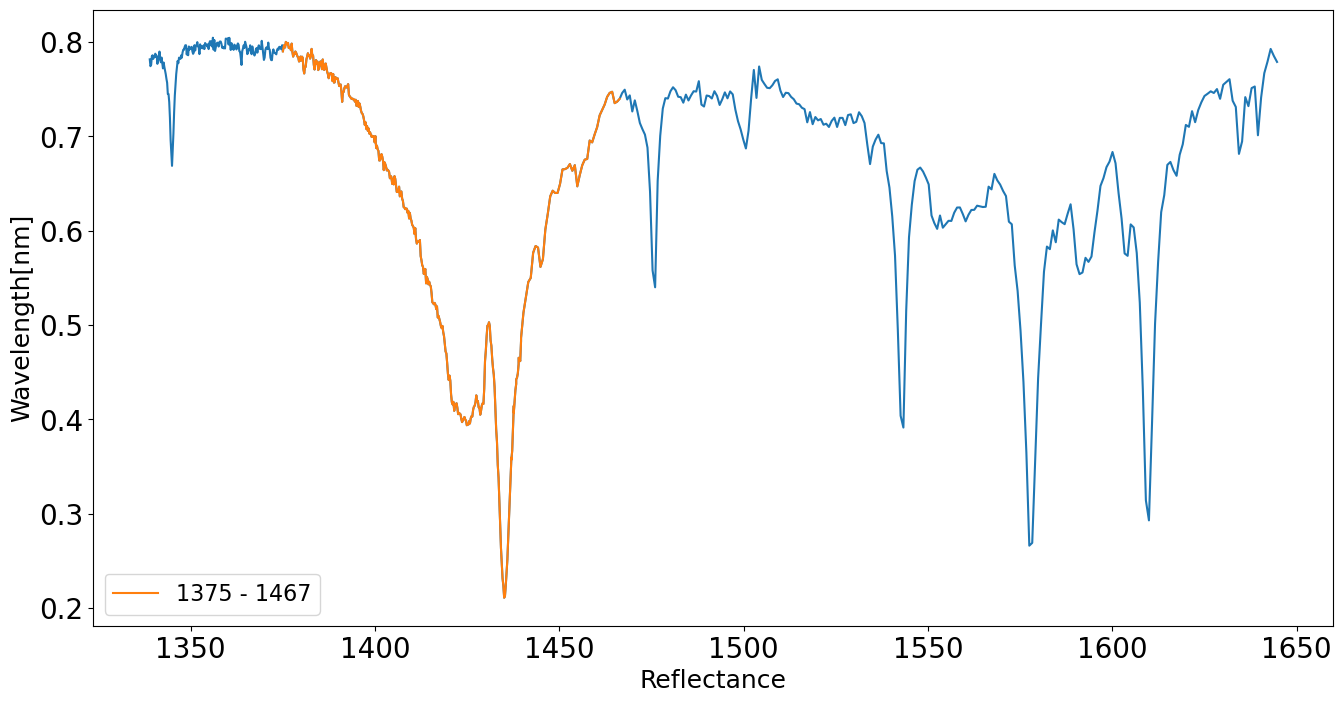

In [19]:
# Ваш код
mask_ice= (co2ice_1 > 1375) & (co2ice_1 < 1467)
plt.figure(figsize=(16,8))
plt.plot(co2ice_1, co2ice_2)
plt.plot(co2ice_1[mask_ice], co2ice_2[mask_ice], label = '1375 - 1467')

plt.xlabel('Reflectance', fontsize=18)
plt.ylabel('Wavelength[nm]', fontsize=18)
plt.gca().tick_params(labelsize=20)
plt.legend(fontsize=16)

## ✨✨ Читеры в `Minecraft`

За последние несколько лет в мире прохождения игр на скорость ([*спидраннинге*](https://en.wikipedia.org/wiki/Speedrunning)) `Minecraft` набрал самую большую популярность среди всех игр. Самой популярной категорией является прохождение случайного зерна без использования разного рода *глитчей* (способов обмануть игру). Такая категория называется `RSG 1.16`, и рекорд в ней на март 2024-го года [7 минут 1 секунда.](https://youtu.be/E3t24Urba6Y?si=EUhenyxNrUg_NShi)

В октябре 2020-го года в сообществе произошел скандал: ютубер `Dream`, который набрал популярность на прохождениях `Minecraft` на скорость, установил хорошее время (5-ое время на тот момент), однако его быстро обвинили в [подозрительно большом везении в случайных событиях](https://en.wikipedia.org/wiki/Dream_(YouTuber)#Speedrun_cheating_scandal). Спустя два месяца, волонтеры сообщества выпустили [подробное расследование](https://youtu.be/-MYw9LcLCb4?si=ktXgwL88yWpTriY7) и [статью](https://mcspeedrun.com/dream.pdf), убедительно показывающие то, что вероятность случайных событий в игре не соответствовала оригинальной игре, а следовательно, с ней происходили манипуляции. 

> ☝️ Подробнее про это на [русском](https://www.youtube.com/watch?v=mW0jeoStANg) и на английском [1](https://youtu.be/f8TlTaTHgzo?si=zanY_dA_UNjdiYPb) и [2](https://youtu.be/G3Yzk-3SZfs?si=xZ1F5pw9XrHGsiiT).

Одно из событий в этой игре имеет весьма сложную математическую структуру. Давайте попробуем его промоделировать!

### Введение

Для того чтобы пройти `Minecraft`, нужно попасть в `End` (измерение края), а чтобы попасть в `End`, нужно получить две вещи: `Blaze rods` ([Огненные стержни](https://ru.minecraft.wiki/w/%D0%9E%D0%B3%D0%BD%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D1%81%D1%82%D0%B5%D1%80%D0%B6%D0%B5%D0%BD%D1%8C)) и `Ender pearls` ([Жемчуг края](https://ru.minecraft.wiki/w/%D0%96%D0%B5%D0%BC%D1%87%D1%83%D0%B3_%D0%9A%D1%80%D0%B0%D1%8F)). Первые выпадают с Ифритов с вероятностью `50%`, а вот вторые обычно добываются с помощью бартера с [Пиглинами](https://ru.minecraft.wiki/w/%D0%9F%D0%B8%D0%B3%D0%BB%D0%B8%D0%BD). В 2020-ом году успех торговли с Пиглинами очень сильно зависел от количества найденного золота.

### Механика бартера

Бартер работает следующим образом:
- Игрок дает в руки пиглину один слиток золота
- Пиглин дает один из случайно выбранных предметов согласно [таблице добычи](https://ru.minecraft.wiki/w/%D0%A2%D0%BE%D0%B2%D0%B0%D1%80%D0%BE%D0%BE%D0%B1%D0%BC%D0%B5%D0%BD#%D0%9F%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81)
- После этого выбирается случайное количество этого предмета согласно этой же таблицы

В версии 1.16 вероятность выглядела следующим образом: вероятность получить `Жемчуг края` составляла `~4.73%`, при этом количество выпавших жемчугов было от 4 до 8. Для уверенного попадания в измерение края необходимо 12 жемчуга. 

### Как выглядит распределение интегральной вероятности получения 12-ти жемчуга от количества золотых слитков в инвентаре игрока?

- Для примера возьмите 25 золота
- Для каждого золота подсчитайте шанс в 0.0473
- Для удачных трейдов сгенрируйте равномерно распредленную случайную величину от 4 до 8
- Повторите `n` раз, подберите это значение сами, точно `n > 10000`
- **(0.3 балла)** (опционально) Нарисуйте гистограмму полученных результатов
- **(0.1 балл)** Посчитайте суммарную вероятность получения 12 и больше жемчуга
- **(0.2 балла)** Посчитайте это распредление для каждого количества золота от 1 до 50
- ✨ С помощью `plt.pcolormesh` постройте двумерное распредление количества золота и количества полученных жемчугов края

In [47]:
# Ваш код